In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### 获取每个元素的杨氏模量

In [2]:
elem_map = pd.read_excel("./Young's modulus.xlsx")
elem_map = {key: value for key, value in zip(elem_map['symbol'], elem_map['E(GPa)'])}

In [3]:
elem_map

{'Li': 4.9,
 'Be': 287.0,
 'Na': 10.0,
 'Mg': 45.0,
 'Al': 70.0,
 'Si': 47.0,
 'Ca': 20.0,
 'Sc': 74.4,
 'Ti': 116.0,
 'V': 128.0,
 'Cr': 279.0,
 'Mn': 198.0,
 'Fe': 211.0,
 'Co': 209.0,
 'Ni': 200.0,
 'Cu': 130.0,
 'Zn': 108.0,
 'As': 8.0,
 'Se': 10.0,
 'Rb': 2.4,
 'Y': 63.5,
 'Zr': 68.0,
 'Nb': 105.0,
 'Mo': 329.0,
 'Ru': 447.0,
 'Rh': 275.0,
 'Pd': 121.0,
 'Ag': 83.0,
 'Cd': 50.0,
 'In': 11.0,
 'Sn': 50.0,
 'Sb': 55.0,
 'Te': 43.0,
 'Cs': 1.7,
 'Ba': 13.0,
 'La': 36.6,
 'Ce': 33.6,
 'Pr': 37.3,
 'Nd': 41.4,
 'Pm': 46.0,
 'Sm': 49.7,
 'Eu': 18.2,
 'Gd': 54.8,
 'Tb': 55.7,
 'Dy': 61.4,
 'Ho': 64.8,
 'Er': 69.9,
 'Tm': 74.0,
 'Yb': 23.9,
 'Lu': 68.6,
 'Hf': 78.0,
 'Ta': 186.0,
 'W': 411.0,
 'Re': 463.0,
 'Ir': 528.0,
 'Pt': 168.0,
 'Au': 78.0,
 'TI': 8.0,
 'Pb': 16.0,
 'Bi': 32.0,
 'Th': 79.0,
 'U': 208.0,
 'Pu': 96.0}

### 读取数据

In [4]:
data_o = pd.read_excel("./Wang's Data/data_processed.xlsx")
data_o

,Chemical compostion（at.%）,E(GPa),Tg(K),Tm(K),ry(GPa),Tx(K),Tl(K),dc(mm),Chemical compostion,Zr,...,La,Pr,Sm,Ho,Dy,Tm,Lu,Mn,W,Ru
0,Zr41Ti14Cu12.5Ni10Be22.5,101.2,NaN,NaN,NaN,NaN,NaN,NaN,Zr41.0Be22.5Ti14.0Cu12.5Ni10.0,41.00,...,0.0,0.0,0,0,0,0.0,0,0.0,0,0
1,Zr46.75Ti8.25Cu7.5Ni10Be27.5,100.5,NaN,NaN,NaN,NaN,NaN,NaN,Zr46.75Be27.5Ni10.0Ti8.25Cu7.5,46.75,...,0.0,0.0,0,0,0,0.0,0,0.0,0,0
2,Zr45.4Ti9.6Cu10.15Ni8.6Be26.25,99.9,NaN,NaN,NaN,NaN,NaN,NaN,Zr45.4Be26.25Cu10.15Ti9.6Ni8.6,45.40,...,0.0,0.0,0,0,0,0.0,0,0.0,0,0
3,Zr52.5Al10Ni10Cu15Be12.5,97.2,NaN,NaN,NaN,NaN,NaN,NaN,Zr52.5Cu15.0Be12.5Al10.0Ni10.0,52.50,...,0.0,0.0,0,0,0,0.0,0,0.0,0,0
4,Zr50Al10Ni10Cu15Be15,104.1,NaN,NaN,NaN,NaN,NaN,NaN,Zr50.0Cu15.0Be15.0Al10.0Ni10.0,50.00,...,0.0,0.0,0,0,0,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Zr64.13Cu13.5Ni12.37Al10,79.7,652.0,NaN,NaN,NaN,NaN,NaN,Zr64.13Cu13.5Ni12.37Al10.0,64.13,...,0.0,0.0,0,0,0,0.0,0,0.0,0,0
311,(Zr59Ti6Cu22Ni13)84Al16,95.1,NaN,NaN,NaN,NaN,NaN,NaN,Zr49.56Cu18.48Al16.0Ni10.92Ti5.04,49.56,...,0.0,0.0,0,0,0,0.0,0,0.0,0,0
312,(Zr59Ti6Cu22Ni13)88Al12,91.1,NaN,NaN,NaN,NaN,NaN,NaN,Zr51.92Cu19.36Al12.0Ni11.44Ti5.28,51.92,...,0.0,0.0,0,0,0,0.0,0,0.0,0,0
313,(Fe60Cr10Mo9C13B6Er2)95Cu5,191.3,NaN,NaN,NaN,NaN,NaN,NaN,Fe57.0C12.35Cr9.5Mo8.55B5.7Cu5.0Er1.9,0.00,...,0.0,0.0,0,0,0,0.0,0,0.0,0,0


### 预测

In [5]:
def calculate_weighted_composition(row, weights_map):
    E_pred = 0
    for column in row.index:
        if column in weights_map and row[column] != 0:
            concentration = row[column] / 100
            E_pred += weights_map[column] * concentration
    return E_pred

In [6]:
data_o['E_pred'] = data_o.apply(lambda x: calculate_weighted_composition(x, elem_map), axis=1)
data_o['yield_pred'] = (data_o['E_pred']/ 50 )* 1000

### 计算指标

In [7]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [9]:
data_o_filtered_e = data_o.dropna(subset=['E_pred', 'E(GPa)'])
# data_o_filtered_yield = data_o.dropna(subset=['yield_pred', 'σy(MPa)'])

# R^2
r2_e_pred = r2_score(data_o_filtered_e['E(GPa)'], data_o_filtered_e['E_pred'])
# r2_yield_pred = r2_score(data_o_filtered_yield['σy(MPa)'], data_o_filtered_yield['yield_pred'])

# MAE
mae_e_pred = mean_absolute_error(data_o_filtered_e['E(GPa)'], data_o_filtered_e['E_pred'])
# mse_yield_pred = mean_absolute_error(data_o_filtered_yield['σy(MPa)'], data_o_filtered_yield['yield_pred'])
# MAPE
mape_e_pred = mean_absolute_percentage_error(data_o_filtered_e['E(GPa)'], data_o_filtered_e['E_pred'])
# mape_yield_pred = mean_absolute_percentage_error(data_o_filtered_yield['σy(MPa)'], data_o_filtered_yield['yield_pred'])

print('R^2 for E_pred:', r2_e_pred)
# print('R^2 for yield_pred:', r2_yield_pred)

print('MAE for E_pred:', mae_e_pred)
# print('MAE for yield_pred:', mse_yield_pred)

print('MAPE for E_pred:', mape_e_pred)
# print('MAPE for yield_pred:', mape_yield_pred)

R^2 for E_pred: 0.6559998773397585
MAE for E_pred: 24.86447816442953
MAPE for E_pred: 38.80956178462331


In [10]:
data_o.to_excel("./Wang's Data/data_processed.xlsx", index=False)

### 绘制

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
data_o = pd.read_excel("./Wang's Data/data_processed.xlsx")

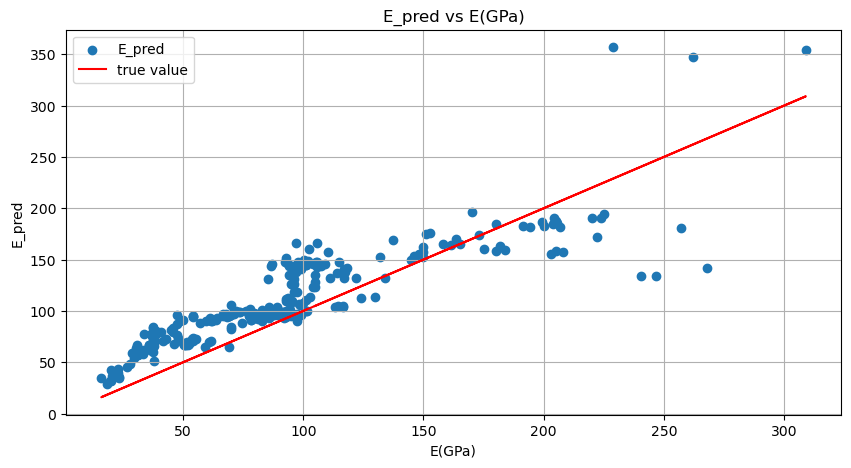

In [13]:
data_o_filtered_e = data_o.dropna(subset=['E_pred', 'E(GPa)'])

plt.figure(figsize=(10, 5))
plt.scatter(data_o_filtered_e['E(GPa)'], data_o_filtered_e['E_pred'], label='E_pred', marker='o')
plt.plot(data_o_filtered_e['E(GPa)'], data_o_filtered_e['E(GPa)'], label='true value', linestyle='-', color='red')
plt.xlabel('E(GPa)')
plt.ylabel('E_pred')
plt.title('E_pred vs E(GPa)')
plt.legend()
plt.grid()
plt.show()

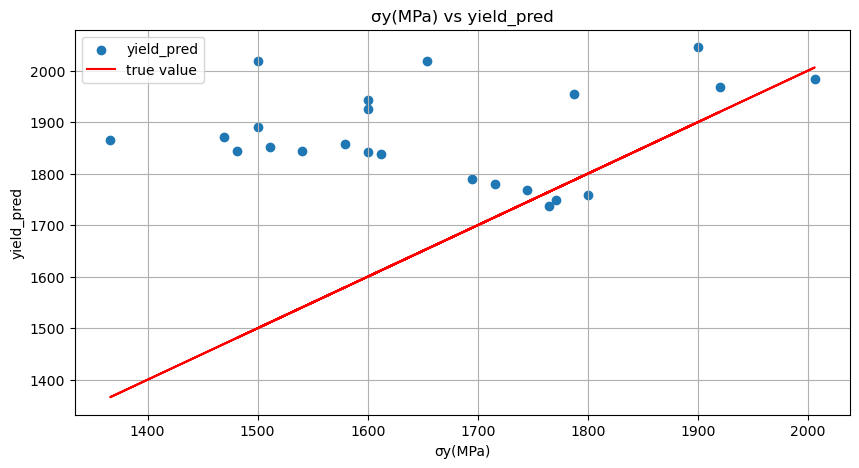

In [6]:
data_o_filtered_yield = data_o.dropna(subset=['yield_pred', 'σy(MPa)'])
plt.figure(figsize=(10, 5))
plt.scatter(data_o_filtered_e['σy(MPa)'], data_o_filtered_e['yield_pred'], label='yield_pred', marker='o')
plt.plot(data_o_filtered_e['σy(MPa)'], data_o_filtered_e['σy(MPa)'], label='true value', linestyle='-', color='red')
plt.xlabel('σy(MPa)')
plt.ylabel('yield_pred')
plt.title('σy(MPa) vs yield_pred')
plt.legend()
plt.grid()
plt.show()